# Air Quality Data - Exploratory Data Analysis & Preprocessing

This notebook performs comprehensive EDA and preprocessing on the air quality dataset:
- Examine time patterns and seasonal effects
- Analyze correlations among pollutants
- Explore relationships between meteorological and chemical variables
- Identify and handle missing values and data quality issues
- Prepare data for machine learning models

In [6]:
#%pip install pandas numpy matplotlib seaborn scikit-learn

## 1. Import Required Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Dataset

In [8]:
# Load the air quality dataset
# Note: Using semicolon as delimiter and handling European decimal format
df = pd.read_csv('../air+quality/AirQualityUCI.csv', sep=';', decimal=',')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (9471, 17)

First few rows:


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## 3. Data Overview & Structure Check

In [9]:
# Check data information
print("=== Data Information ===")
df.info()

print("\n=== Column Names ===")
print(df.columns.tolist())

print("\n=== Basic Statistics ===")
df.describe()

=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
m

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


## 4. Missing Values Check & Handling

In [10]:
# Remove empty columns (trailing columns with all NaN)
df = df.dropna(axis=1, how='all')

# Check for missing values (NaN)
print("=== Missing Values (NaN) ===")
missing_nan = df.isnull().sum()
print(missing_nan[missing_nan > 0])

# Check for -200 values (sensor missing data indicator)
print("\n=== -200 Values Count by Column ===")
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        count_neg200 = (df[col] == -200).sum()
        if count_neg200 > 0:
            print(f"{col}: {count_neg200} ({count_neg200/len(df)*100:.2f}%)")

=== Missing Values (NaN) ===
Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

=== -200 Values Count by Column ===
CO(GT): 1683 (17.77%)
PT08.S1(CO): 366 (3.86%)
NMHC(GT): 8443 (89.15%)
C6H6(GT): 366 (3.86%)
PT08.S2(NMHC): 366 (3.86%)
NOx(GT): 1639 (17.31%)
PT08.S3(NOx): 366 (3.86%)
NO2(GT): 1642 (17.34%)
PT08.S4(NO2): 366 (3.86%)
PT08.S5(O3): 366 (3.86%)
T: 366 (3.86%)
RH: 366 (3.86%)
AH: 366 (3.86%)


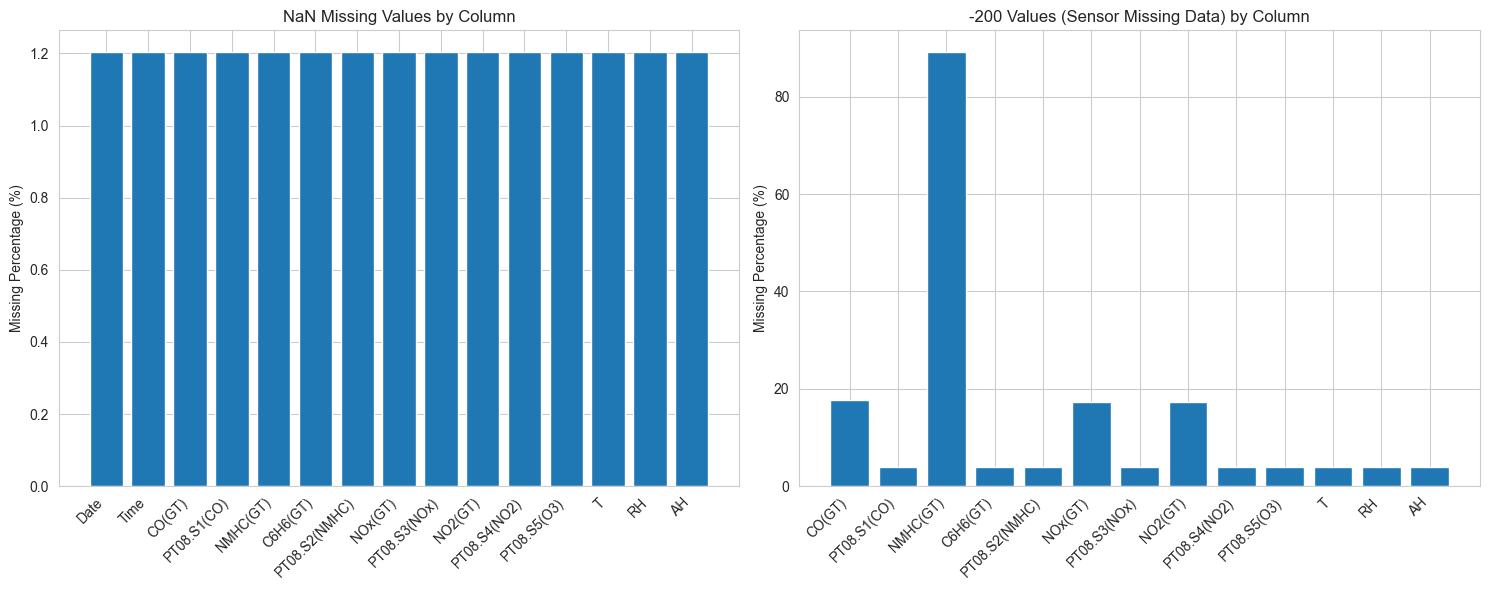

In [11]:
# Visualize missing data pattern
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# NaN missing values
missing_nan_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_nan_pct = missing_nan_pct[missing_nan_pct > 0]
if len(missing_nan_pct) > 0:
    axes[0].bar(range(len(missing_nan_pct)), missing_nan_pct.values)
    axes[0].set_xticks(range(len(missing_nan_pct)))
    axes[0].set_xticklabels(missing_nan_pct.index, rotation=45, ha='right')
    axes[0].set_ylabel('Missing Percentage (%)')
    axes[0].set_title('NaN Missing Values by Column')
else:
    axes[0].text(0.5, 0.5, 'No NaN missing values', ha='center', va='center')
    axes[0].set_title('NaN Missing Values by Column')

# -200 values
neg200_counts = {}
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        count = (df[col] == -200).sum()
        if count > 0:
            neg200_counts[col] = count / len(df) * 100

if neg200_counts:
    axes[1].bar(range(len(neg200_counts)), list(neg200_counts.values()))
    axes[1].set_xticks(range(len(neg200_counts)))
    axes[1].set_xticklabels(list(neg200_counts.keys()), rotation=45, ha='right')
    axes[1].set_ylabel('Missing Percentage (%)')
    axes[1].set_title('-200 Values (Sensor Missing Data) by Column')
else:
    axes[1].text(0.5, 0.5, 'No -200 values found', ha='center', va='center')
    axes[1].set_title('-200 Values by Column')

plt.tight_layout()
plt.show()

## 5. Merge Date & Time Fields into Unified Timestamp

In [12]:
# Combine Date and Time into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Remove rows with invalid datetime
df = df[df['DateTime'].notna()].copy()

# Set DateTime as index
df.set_index('DateTime', inplace=True)

# Sort by datetime
df.sort_index(inplace=True)

print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Total time span: {(df.index.max() - df.index.min()).days} days")
print(f"\nDataset shape after datetime processing: {df.shape}")

Date range: 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Total time span: 389 days

Dataset shape after datetime processing: (9357, 15)


## 6. Handle Decimal Separator & Data Type Conversion

In [13]:
# Drop the original Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Check data types
print("=== Current Data Types ===")
print(df.dtypes)

# Verify all numeric columns are properly typed
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"\n=== Numeric columns ({len(numeric_cols)}) ===")
print(numeric_cols.tolist())

=== Current Data Types ===
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

=== Numeric columns (13) ===
['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


## 7. Replace -200 Missing Values with NaN

=== Missing Values Summary After -200 Replacement ===
               Missing_Count  Missing_Percentage
NMHC(GT)                8443               90.23
CO(GT)                  1683               17.99
NO2(GT)                 1642               17.55
NOx(GT)                 1639               17.52
PT08.S1(CO)              366                3.91
C6H6(GT)                 366                3.91
PT08.S2(NMHC)            366                3.91
PT08.S3(NOx)             366                3.91
PT08.S4(NO2)             366                3.91
PT08.S5(O3)              366                3.91
T                        366                3.91
RH                       366                3.91
AH                       366                3.91


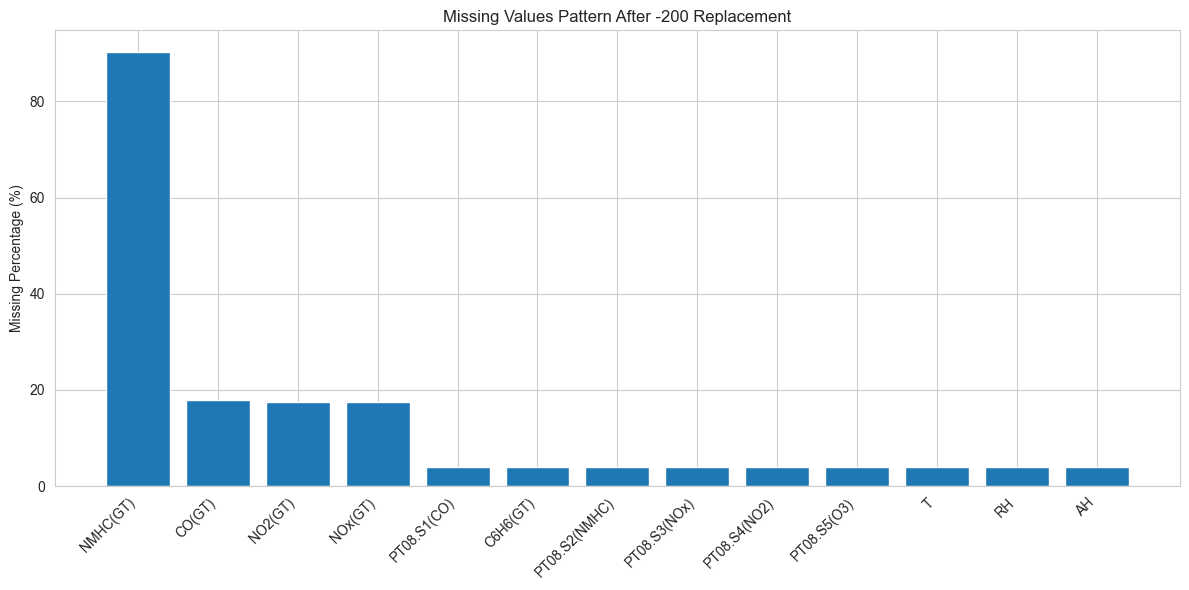

In [14]:
# Replace -200 with NaN for proper handling
df.replace(-200, np.nan, inplace=True)

# Check missing values after replacement
print("=== Missing Values Summary After -200 Replacement ===")
missing_summary = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_summary)

# Visualize missing pattern
plt.figure(figsize=(12, 6))
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]
plt.bar(range(len(missing_pct)), missing_pct.values)
plt.xticks(range(len(missing_pct)), missing_pct.index, rotation=45, ha='right')
plt.ylabel('Missing Percentage (%)')
plt.title('Missing Values Pattern After -200 Replacement')
plt.tight_layout()
plt.show()

In [15]:
# Handle missing values using forward fill then backward fill for time series data
# This is appropriate for sensor data where values change gradually over time
df_filled = df.copy()
df_filled = df_filled.fillna(method='ffill').fillna(method='bfill')

print(f"Missing values after interpolation: {df_filled.isnull().sum().sum()}")
print(f"\nData shape: {df_filled.shape}")

Missing values after interpolation: 0

Data shape: (9357, 13)


## 8. Extract Temporal Features

In [16]:
# Extract temporal features from datetime index
df_filled['hour_of_day'] = df_filled.index.hour
df_filled['day_of_week'] = df_filled.index.dayofweek  # Monday=0, Sunday=6
df_filled['day_of_month'] = df_filled.index.day
df_filled['month_of_year'] = df_filled.index.month
df_filled['week_of_year'] = df_filled.index.isocalendar().week

# Create season feature (1=Winter, 2=Spring, 3=Summer, 4=Autumn for Northern Hemisphere)
df_filled['season'] = df_filled['month_of_year'].apply(
    lambda x: 1 if x in [12, 1, 2] else 2 if x in [3, 4, 5] else 3 if x in [6, 7, 8] else 4
)

# Create is_weekend feature
df_filled['is_weekend'] = (df_filled['day_of_week'] >= 5).astype(int)

print("=== Temporal Features Created ===")
print(df_filled[['hour_of_day', 'day_of_week', 'month_of_year', 'season', 'is_weekend']].head(10))

=== Temporal Features Created ===
                     hour_of_day  day_of_week  month_of_year  season  \
DateTime                                                               
2004-03-10 18:00:00           18            2              3       2   
2004-03-10 19:00:00           19            2              3       2   
2004-03-10 20:00:00           20            2              3       2   
2004-03-10 21:00:00           21            2              3       2   
2004-03-10 22:00:00           22            2              3       2   
2004-03-10 23:00:00           23            2              3       2   
2004-03-11 00:00:00            0            3              3       2   
2004-03-11 01:00:00            1            3              3       2   
2004-03-11 02:00:00            2            3              3       2   
2004-03-11 03:00:00            3            3              3       2   

                     is_weekend  
DateTime                         
2004-03-10 18:00:00           0  

## 9. Time Patterns Analysis

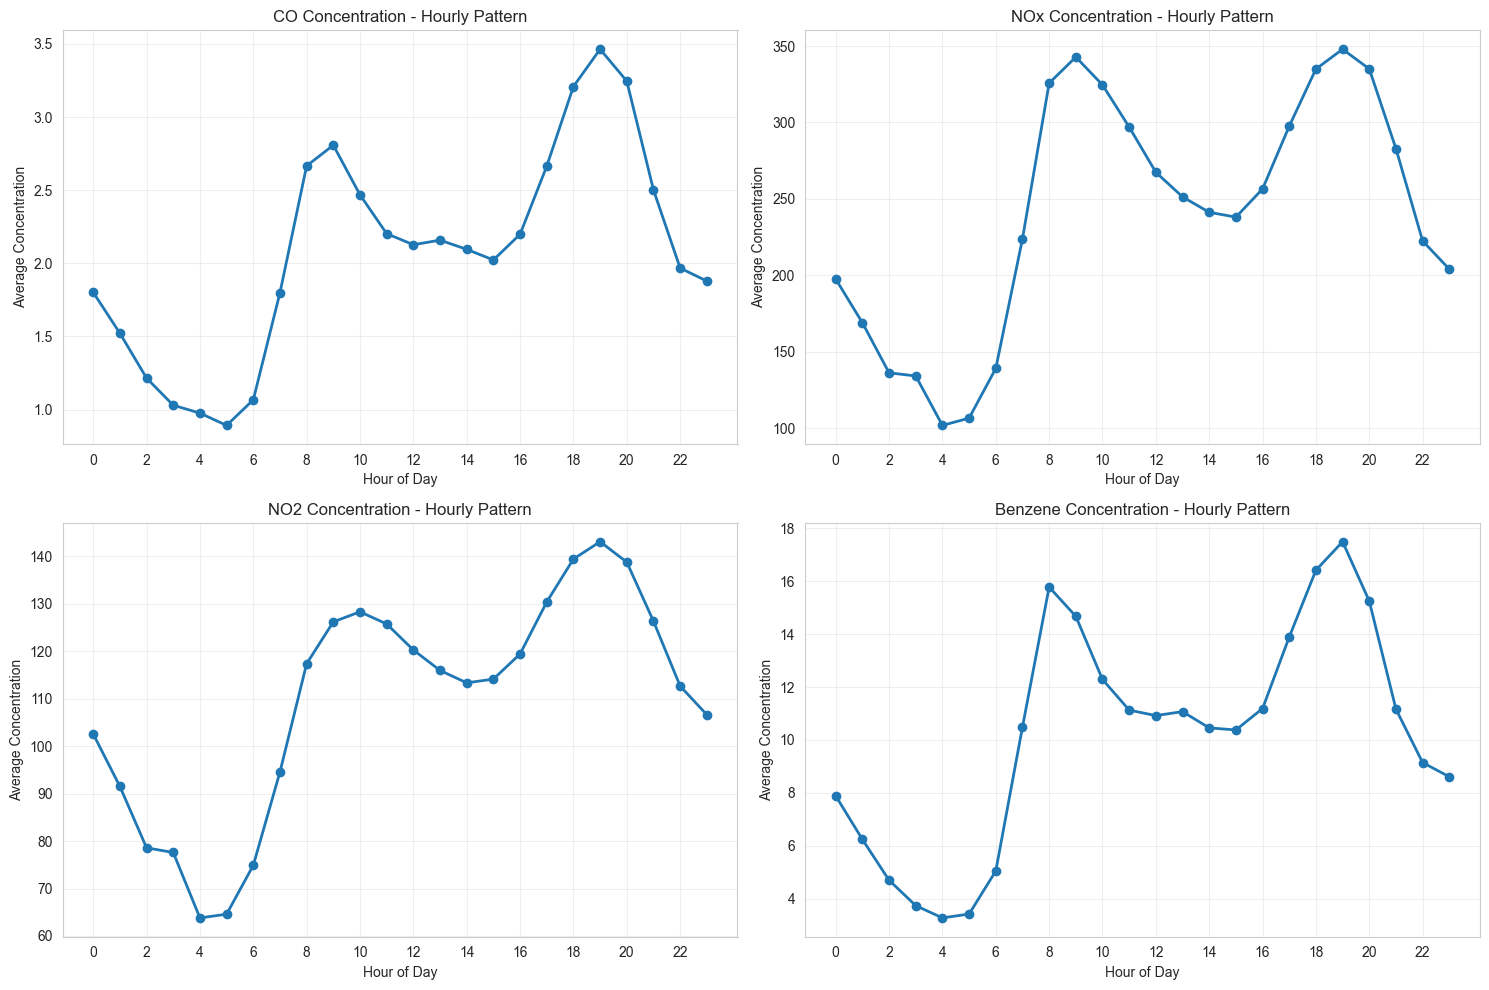

In [17]:
# Analyze hourly patterns for key pollutants
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']
titles = ['CO Concentration', 'NOx Concentration', 'NO2 Concentration', 'Benzene Concentration']

for idx, (pollutant, title) in enumerate(zip(pollutants, titles)):
    ax = axes[idx // 2, idx % 2]
    hourly_mean = df_filled.groupby('hour_of_day')[pollutant].mean()
    ax.plot(hourly_mean.index, hourly_mean.values, marker='o', linewidth=2)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Average Concentration')
    ax.set_title(f'{title} - Hourly Pattern')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

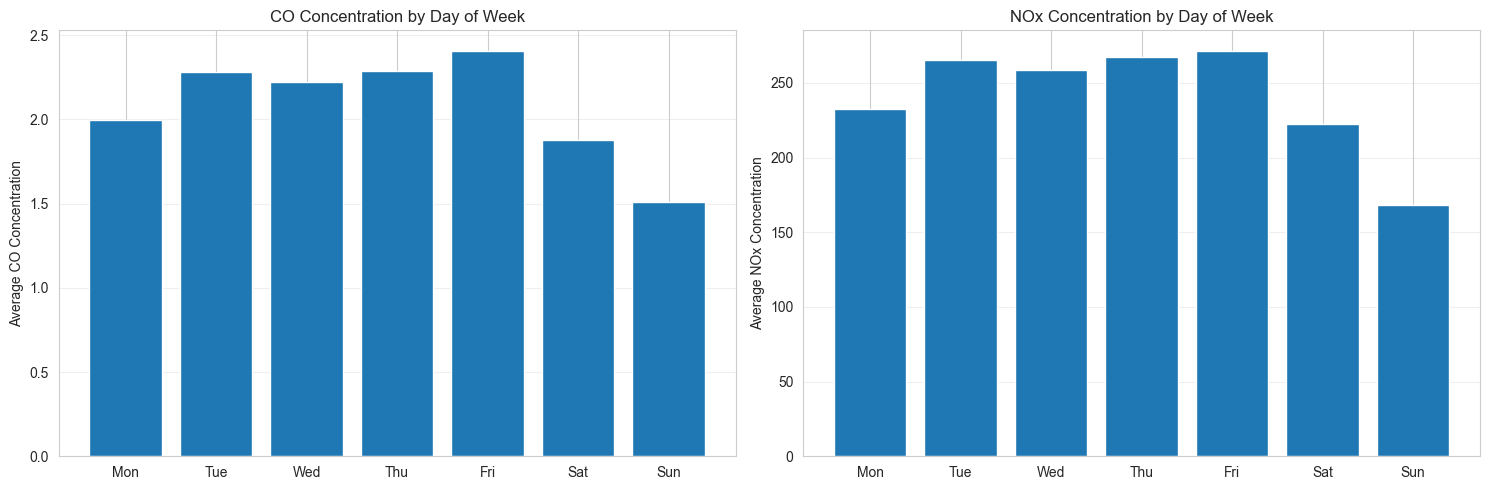

In [18]:
# Analyze day of week patterns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# CO pattern by day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_mean_co = df_filled.groupby('day_of_week')['CO(GT)'].mean()
axes[0].bar(range(7), dow_mean_co.values)
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(day_names)
axes[0].set_ylabel('Average CO Concentration')
axes[0].set_title('CO Concentration by Day of Week')
axes[0].grid(True, alpha=0.3, axis='y')

# NOx pattern by day of week
dow_mean_nox = df_filled.groupby('day_of_week')['NOx(GT)'].mean()
axes[1].bar(range(7), dow_mean_nox.values)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)
axes[1].set_ylabel('Average NOx Concentration')
axes[1].set_title('NOx Concentration by Day of Week')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 10. Seasonal Effects Analysis

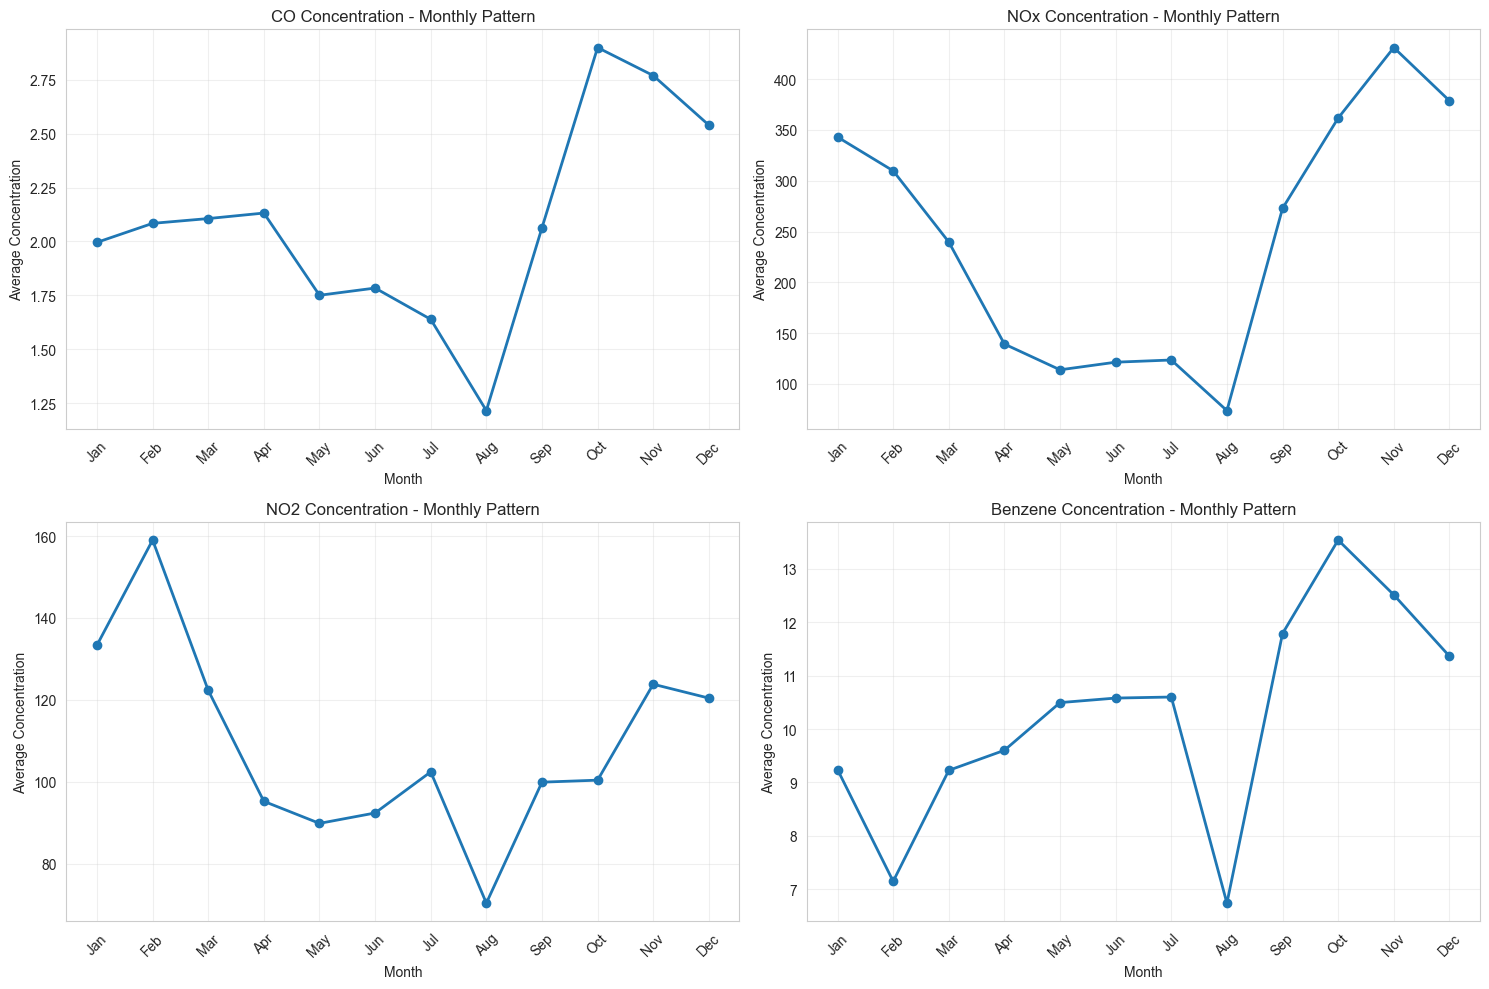

In [19]:
# Monthly patterns for pollutants
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for idx, (pollutant, title) in enumerate(zip(pollutants, titles)):
    ax = axes[idx // 2, idx % 2]
    monthly_mean = df_filled.groupby('month_of_year')[pollutant].mean()
    ax.plot(monthly_mean.index, monthly_mean.values, marker='o', linewidth=2)
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Concentration')
    ax.set_title(f'{title} - Monthly Pattern')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_names, rotation=45)

plt.tight_layout()
plt.show()

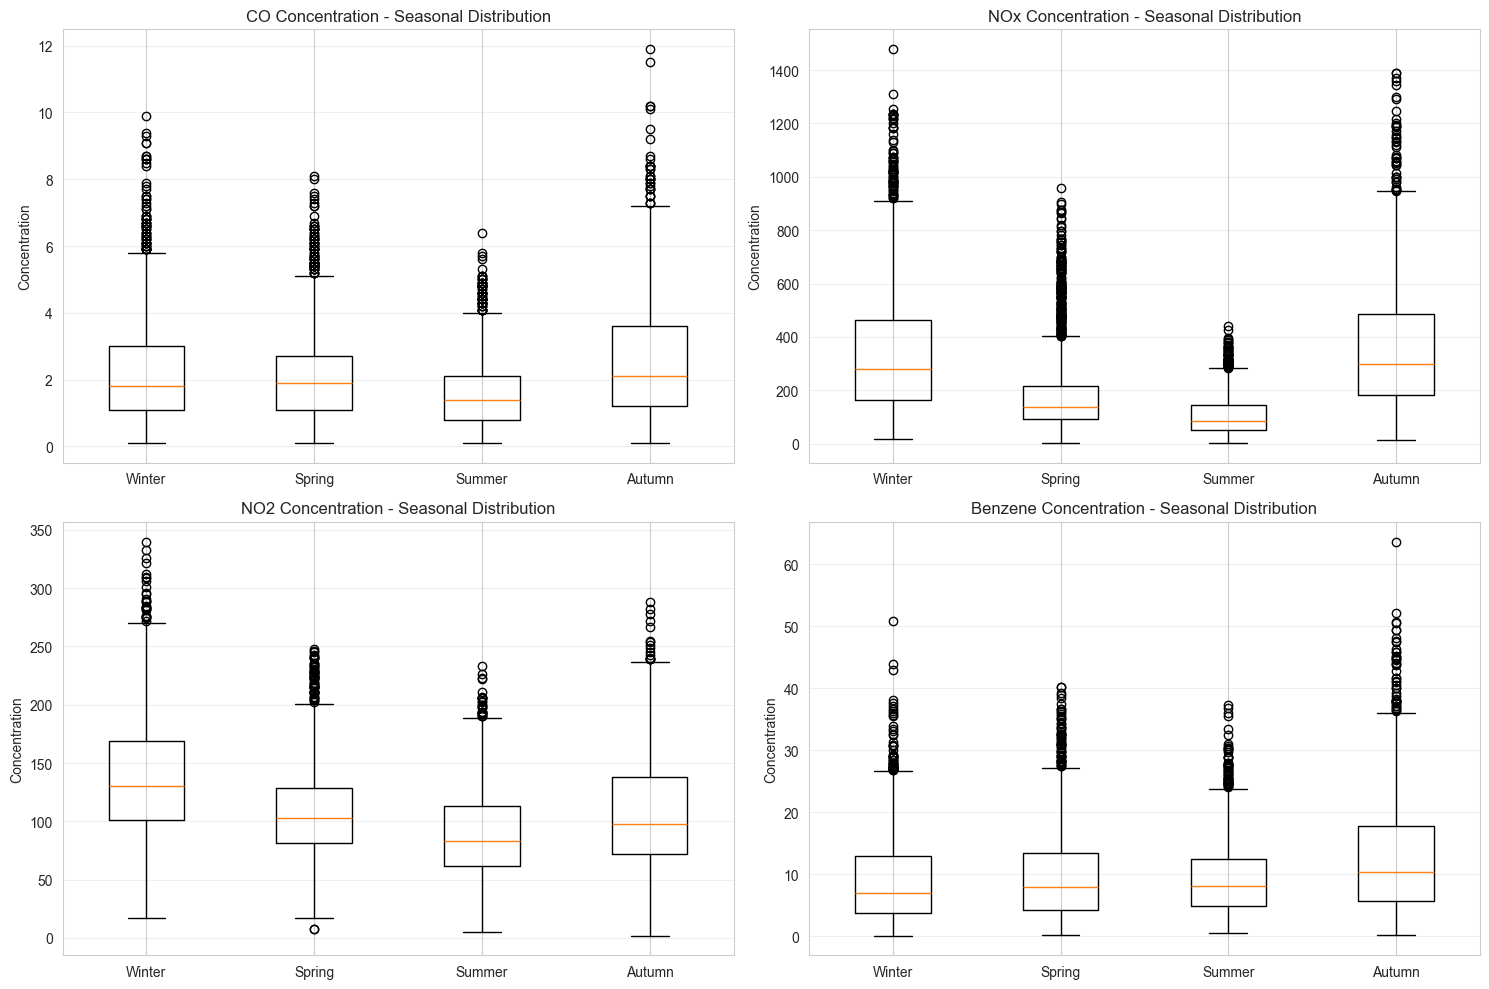

In [20]:
# Seasonal comparison using boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}

for idx, (pollutant, title) in enumerate(zip(pollutants, titles)):
    ax = axes[idx // 2, idx % 2]
    data_to_plot = [df_filled[df_filled['season'] == s][pollutant].values for s in [1, 2, 3, 4]]
    ax.boxplot(data_to_plot, labels=['Winter', 'Spring', 'Summer', 'Autumn'])
    ax.set_ylabel('Concentration')
    ax.set_title(f'{title} - Seasonal Distribution')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 11. Pollutant Correlation Analysis

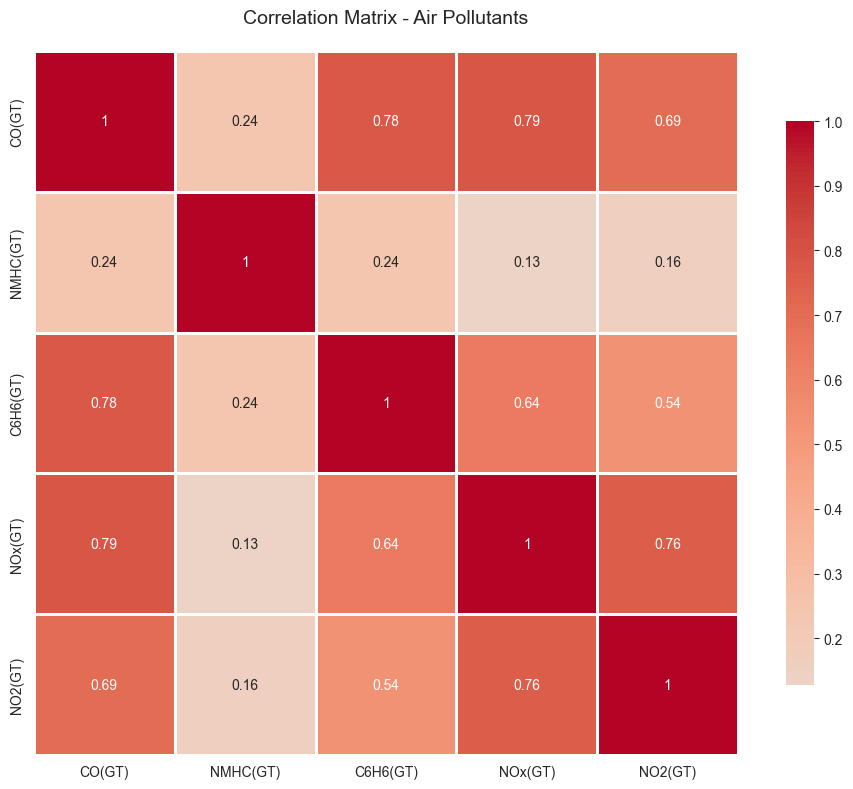


=== Strong Correlations (|r| > 0.7) ===
CO(GT) vs C6H6(GT): 0.779
CO(GT) vs NOx(GT): 0.788
NOx(GT) vs NO2(GT): 0.764


In [21]:
# Select pollutant columns (GT = Ground Truth concentrations)
pollutant_cols = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Calculate correlation matrix
correlation_matrix = df_filled[pollutant_cols].corr()

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Air Pollutants', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\n=== Strong Correlations (|r| > 0.7) ===")
# Find strong correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

## 12. Meteorological & Chemical Variables Relationship

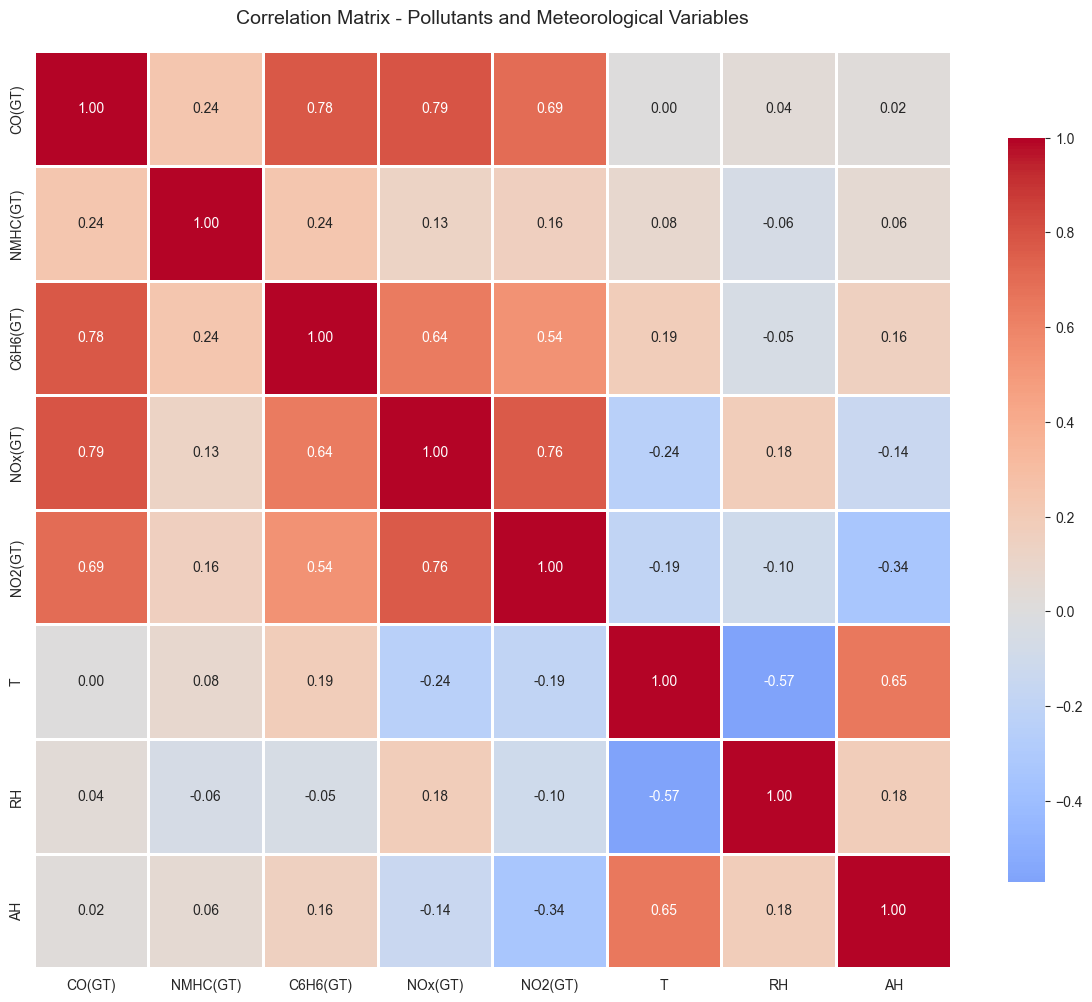

In [22]:
# Meteorological variables
meteo_cols = ['T', 'RH', 'AH']

# Create combined correlation matrix
all_cols = pollutant_cols + meteo_cols
combined_corr = df_filled[all_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix - Pollutants and Meteorological Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

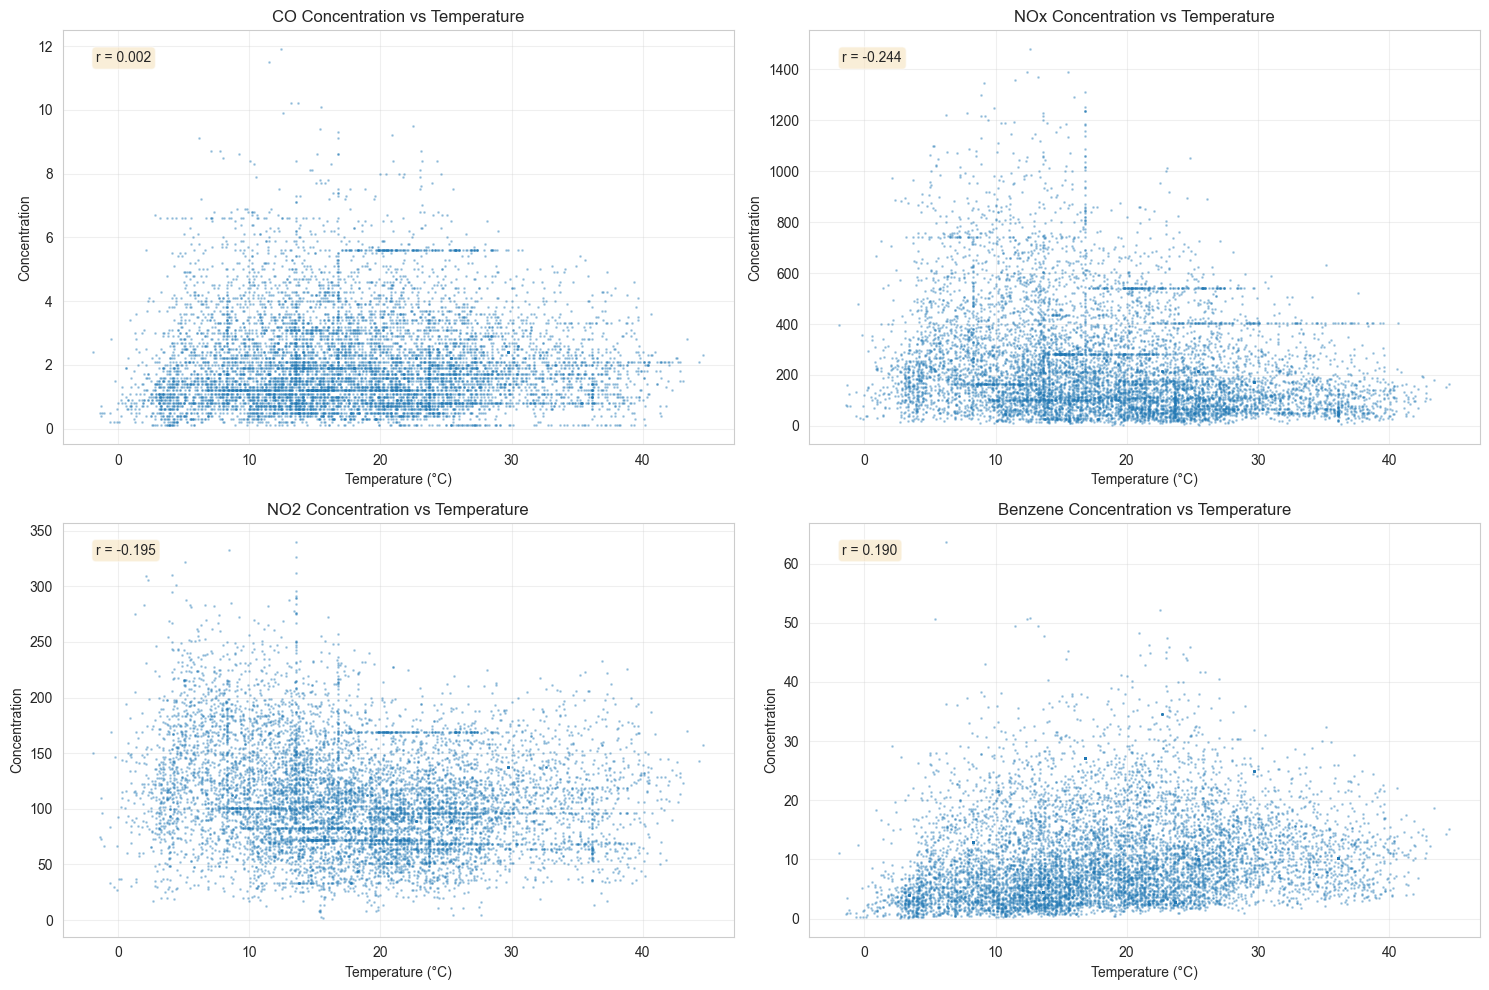

In [23]:
# Scatter plots: Temperature vs key pollutants
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, (pollutant, title) in enumerate(zip(pollutants, titles)):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(df_filled['T'], df_filled[pollutant], alpha=0.3, s=1)
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Concentration')
    ax.set_title(f'{title} vs Temperature')
    
    # Add correlation coefficient
    corr = df_filled[['T', pollutant]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
            verticalalignment='top')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

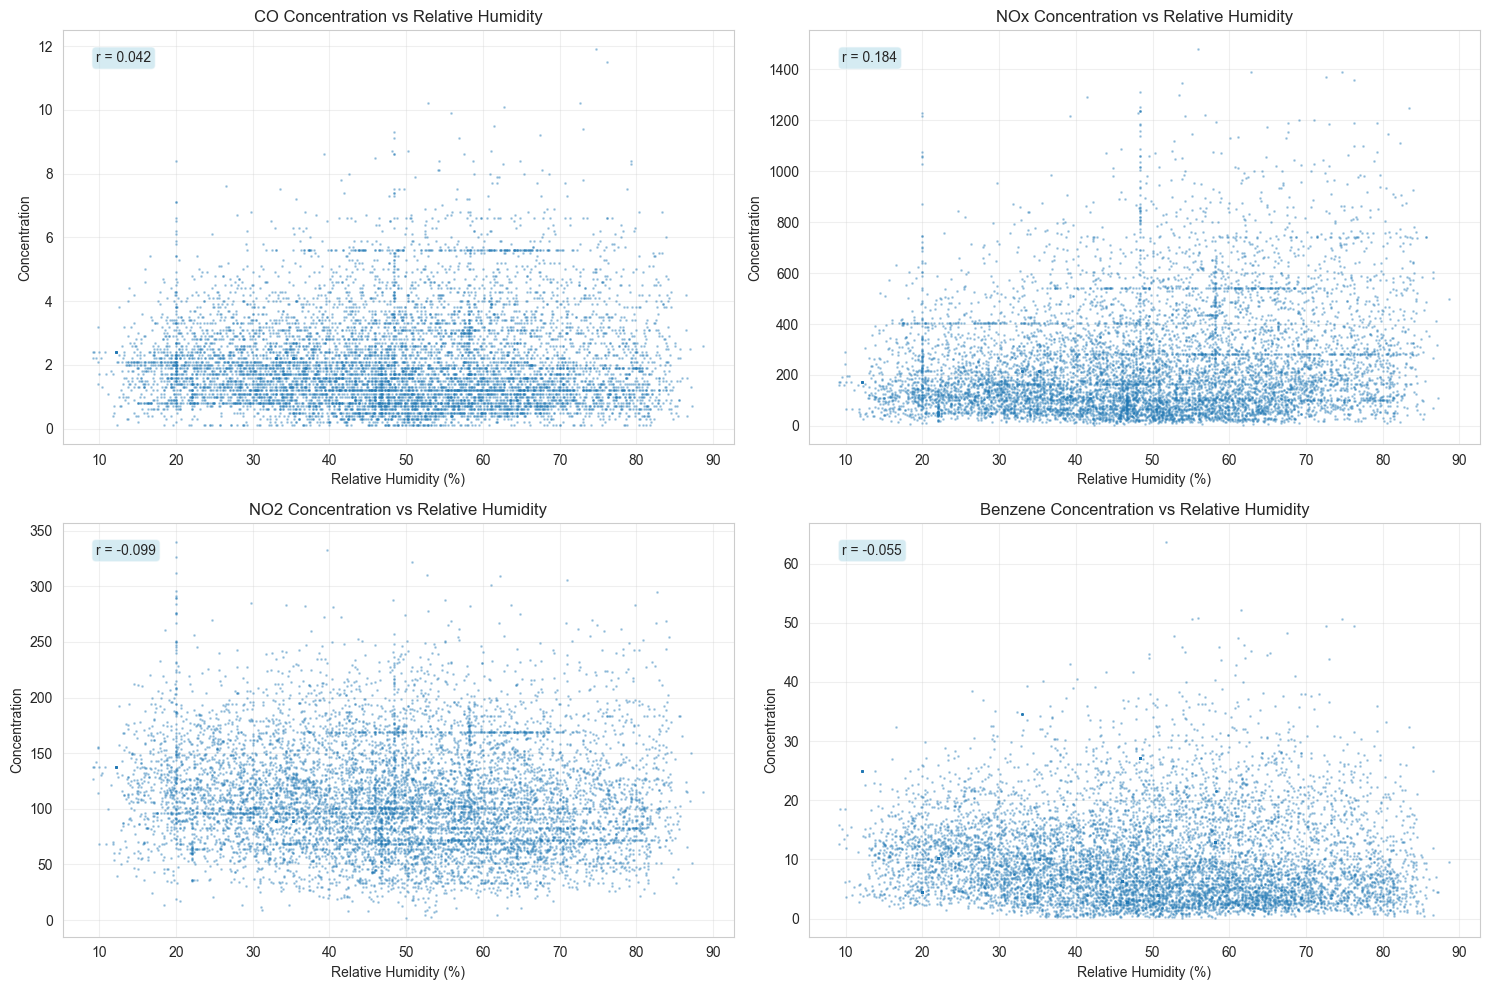

In [24]:
# Scatter plots: Relative Humidity vs key pollutants
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, (pollutant, title) in enumerate(zip(pollutants, titles)):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(df_filled['RH'], df_filled[pollutant], alpha=0.3, s=1)
    ax.set_xlabel('Relative Humidity (%)')
    ax.set_ylabel('Concentration')
    ax.set_title(f'{title} vs Relative Humidity')
    
    # Add correlation coefficient
    corr = df_filled[['RH', pollutant]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5),
            verticalalignment='top')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 13. Sensor Response vs True Concentration Analysis

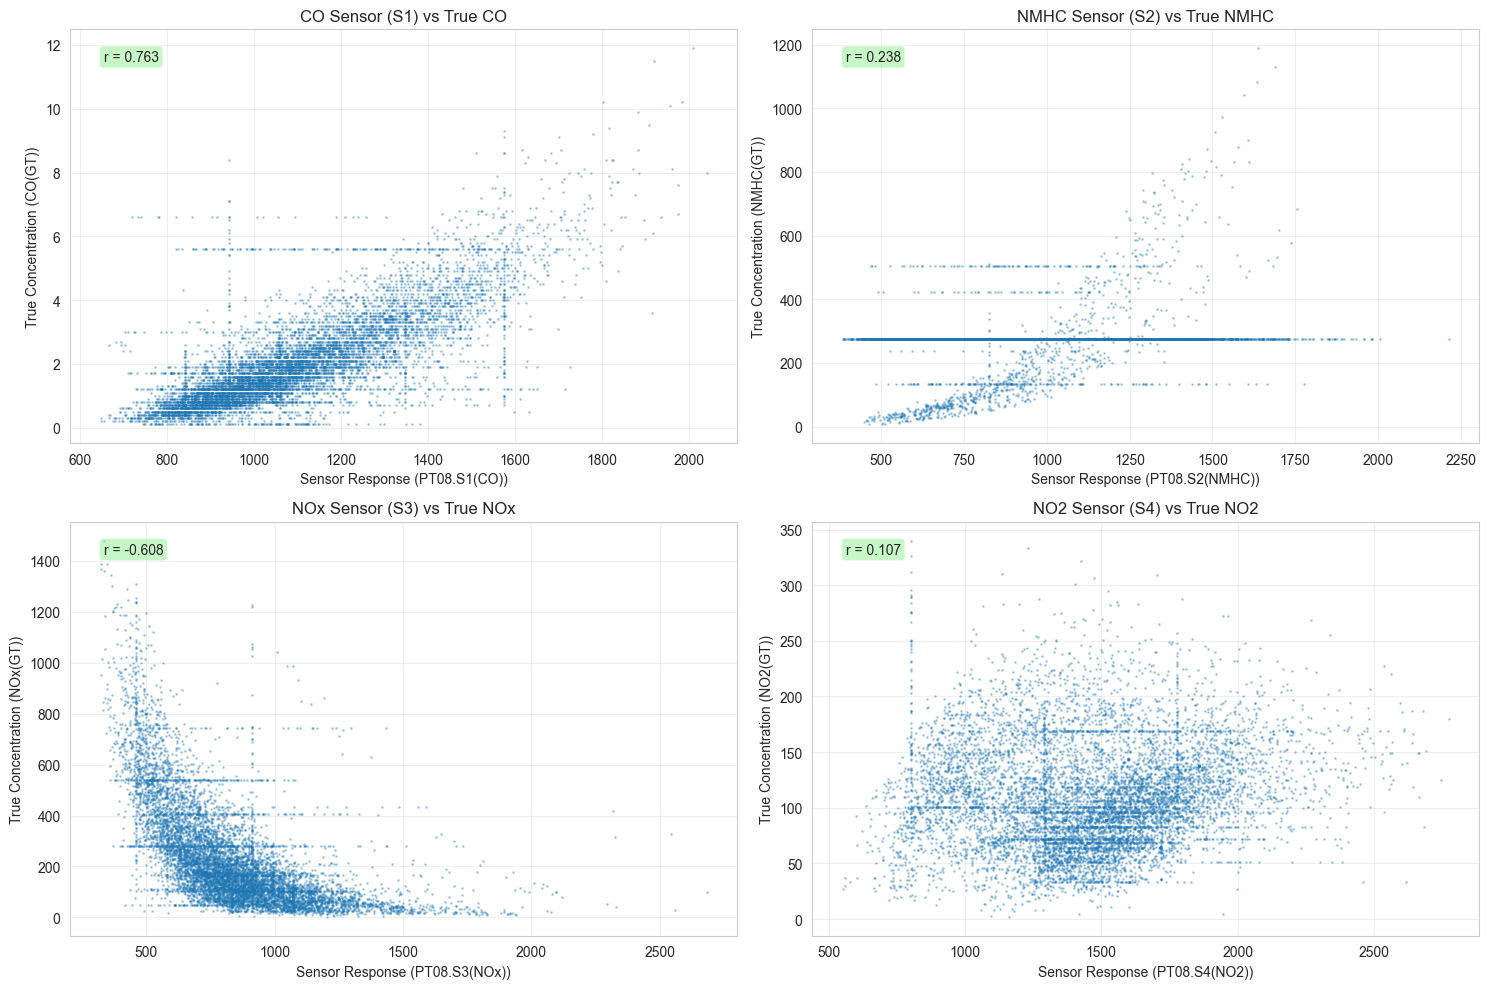

In [25]:
# Analyze sensor responses vs true concentrations
sensor_pairs = [
    ('PT08.S1(CO)', 'CO(GT)', 'CO Sensor (S1) vs True CO'),
    ('PT08.S2(NMHC)', 'NMHC(GT)', 'NMHC Sensor (S2) vs True NMHC'),
    ('PT08.S3(NOx)', 'NOx(GT)', 'NOx Sensor (S3) vs True NOx'),
    ('PT08.S4(NO2)', 'NO2(GT)', 'NO2 Sensor (S4) vs True NO2')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for idx, (sensor, true_val, title) in enumerate(sensor_pairs):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(df_filled[sensor], df_filled[true_val], alpha=0.3, s=1)
    ax.set_xlabel(f'Sensor Response ({sensor})')
    ax.set_ylabel(f'True Concentration ({true_val})')
    ax.set_title(title)
    
    # Calculate and display correlation
    corr = df_filled[[sensor, true_val]].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
            verticalalignment='top')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 14. Normalize Continuous Features

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify continuous features (excluding temporal features)
continuous_features = [
    'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
    'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
    'T', 'RH', 'AH'
]

# Create a copy for normalized data
df_normalized = df_filled.copy()

# Apply StandardScaler (zero mean, unit variance)
scaler = StandardScaler()
df_normalized[continuous_features] = scaler.fit_transform(df_filled[continuous_features])

print("=== Normalization Applied (StandardScaler) ===")
print(f"Features normalized: {len(continuous_features)}")
print(f"\nNormalized data statistics:")
print(df_normalized[continuous_features].describe())

=== Normalization Applied (StandardScaler) ===
Features normalized: 13

Normalized data statistics:
             CO(GT)   PT08.S1(CO)      NMHC(GT)      C6H6(GT)  PT08.S2(NMHC)  \
count  9.357000e+03  9.357000e+03  9.357000e+03  9.357000e+03   9.357000e+03   
mean  -2.912337e-14 -2.308486e-16  8.504947e-17  6.791807e-15  -2.118643e-16   
std    1.000053e+00  1.000053e+00  1.000053e+00  1.000053e+00   1.000053e+00   
min   -1.348686e+00 -2.075498e+00 -3.594627e+00 -1.333761e+00  -2.075730e+00   
25%   -7.363261e-01 -7.502190e-01  6.143355e-02 -7.653815e-01  -7.773514e-01   
50%   -2.600458e-01 -1.854952e-01  6.143355e-02 -2.498745e-01  -1.170331e-01   
75%    4.883947e-01  6.114940e-01  6.143355e-02  5.035589e-01   6.471555e-01   
max    6.680039e+00  4.268536e+00  1.253024e+01  7.072969e+00   4.716645e+00   

            NOx(GT)  PT08.S3(NOx)       NO2(GT)  PT08.S4(NO2)   PT08.S5(O3)  \
count  9.357000e+03  9.357000e+03  9.357000e+03  9.357000e+03  9.357000e+03   
mean  -4.859970e-17  

## 15. Data Quality Issues Summary

In [27]:
print("=" * 80)
print("DATA QUALITY ASSESSMENT SUMMARY")
print("=" * 80)

print("\n1. MISSING VALUES:")
print(f"   - Original dataset had -200 values indicating sensor failures")
print(f"   - Missing values handled using forward/backward fill interpolation")
print(f"   - Final dataset has {df_filled.isnull().sum().sum()} missing values")

print("\n2. DATA PREPROCESSING STEPS COMPLETED:")
print(f"   ✓ Merged Date and Time into unified DateTime index")
print(f"   ✓ Handled European decimal format (comma to dot conversion)")
print(f"   ✓ Replaced -200 sensor failure values with NaN")
print(f"   ✓ Interpolated missing values using time-series methods")
print(f"   ✓ Extracted temporal features (hour, day, month, season, weekend)")
print(f"   ✓ Normalized continuous features using StandardScaler")

print("\n3. DATASET CHARACTERISTICS:")
print(f"   - Total records: {len(df_filled):,}")
print(f"   - Time period: {df_filled.index.min()} to {df_filled.index.max()}")
print(f"   - Duration: {(df_filled.index.max() - df_filled.index.min()).days} days")
print(f"   - Features: {len(df_filled.columns)}")
print(f"   - Pollutant variables: 5 (CO, NMHC, Benzene, NOx, NO2)")
print(f"   - Sensor variables: 5 (PT08.S1-S5)")
print(f"   - Meteorological variables: 3 (T, RH, AH)")
print(f"   - Temporal features: 7 (hour, day_of_week, day_of_month, month, week, season, is_weekend)")

print("\n4. KEY FINDINGS:")
print(f"   - Strong hourly patterns observed in pollutant concentrations")
print(f"   - Seasonal variations present in air quality")
print(f"   - High correlation between sensor responses and true concentrations")
print(f"   - Temperature and humidity show relationships with pollutant levels")

print("\n" + "=" * 80)

DATA QUALITY ASSESSMENT SUMMARY

1. MISSING VALUES:
   - Original dataset had -200 values indicating sensor failures
   - Missing values handled using forward/backward fill interpolation
   - Final dataset has 0 missing values

2. DATA PREPROCESSING STEPS COMPLETED:
   ✓ Merged Date and Time into unified DateTime index
   ✓ Handled European decimal format (comma to dot conversion)
   ✓ Replaced -200 sensor failure values with NaN
   ✓ Interpolated missing values using time-series methods
   ✓ Extracted temporal features (hour, day, month, season, weekend)
   ✓ Normalized continuous features using StandardScaler

3. DATASET CHARACTERISTICS:
   - Total records: 9,357
   - Time period: 2004-03-10 18:00:00 to 2005-04-04 14:00:00
   - Duration: 389 days
   - Features: 20
   - Pollutant variables: 5 (CO, NMHC, Benzene, NOx, NO2)
   - Sensor variables: 5 (PT08.S1-S5)
   - Meteorological variables: 3 (T, RH, AH)
   - Temporal features: 7 (hour, day_of_week, day_of_month, month, week, season, i

## 16. Save Processed Data

In [28]:
# Save the cleaned dataset (with filled missing values, not normalized)
output_path_clean = '../data/processed/air_quality_cleaned.csv'
df_filled.to_csv(output_path_clean)
print(f"✓ Cleaned dataset saved to: {output_path_clean}")
print(f"  Shape: {df_filled.shape}")

# Save the normalized dataset
output_path_normalized = '../data/processed/air_quality_normalized.csv'
df_normalized.to_csv(output_path_normalized)
print(f"✓ Normalized dataset saved to: {output_path_normalized}")
print(f"  Shape: {df_normalized.shape}")

# Save the scaler for later use in modeling
import pickle
scaler_path = '../data/processed/scaler.pkl'
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"✓ Scaler saved to: {scaler_path}")

print("\n" + "=" * 80)
print("DATA PREPROCESSING COMPLETE!")
print("=" * 80)
print("\nNext steps:")
print("1. Feature selection and engineering")
print("2. Model development (regression/classification)")
print("3. Model evaluation and comparison")
print("4. Hyperparameter tuning")
print("=" * 80)

✓ Cleaned dataset saved to: ../data/processed/air_quality_cleaned.csv
  Shape: (9357, 20)
✓ Normalized dataset saved to: ../data/processed/air_quality_normalized.csv
  Shape: (9357, 20)
✓ Scaler saved to: ../data/processed/scaler.pkl

DATA PREPROCESSING COMPLETE!

Next steps:
1. Feature selection and engineering
2. Model development (regression/classification)
3. Model evaluation and comparison
4. Hyperparameter tuning


Completed Tasks:
1. Exploratory Data Analysis (EDA)
✓ Time patterns analysis (hourly, daily, weekly)
✓ Seasonal effects visualization
✓ Pollutant correlation analysis
✓ Meteorological vs chemical variables relationships
✓ Sensor response vs true concentration analysis
✓ Missing values identification and visualization
2. Data Preprocessing
✓ Merged Date and Time into unified DateTime index
✓ Handled European decimal format (semicolon delimiter, comma decimal)
✓ Replaced -200 sensor failure values with NaN
✓ Interpolated missing values using forward/backward fill
✓ Created temporal features (hour, day_of_week, month, season, is_weekend)
✓ Normalized continuous features using StandardScaler
✓ Saved both cleaned and normalized datasets
Notebook Structure (16 sections):
Import libraries
Load dataset
Data overview & structure check
Missing values check & handling
Merge Date & Time fields
Handle decimal separator & data types
Replace -200 values with NaN
Extract temporal features
Time patterns analysis
Seasonal effects analysis
Pollutant correlation analysis
Meteorological & chemical variables relationship
Sensor response vs true concentration
Normalize continuous features
Data quality summary
Save processed data
Output Files:
data/processed/air_quality_cleaned.csv - Cleaned dataset with filled missing values
data/processed/air_quality_normalized.csv - Normalized dataset ready for ML
data/processed/scaler.pkl - Saved StandardScaler for consistent transformation